<a href="https://colab.research.google.com/github/kevincong95/cs231n-emotiw/blob/master/audio/audio_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive' , force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.system("pip install pydub")
os.system("pip install vggish-keras")
os.system("pip install 'git+https://github.com/beasteers/pumpp@tf_keras')") #Update the path base.py file


512

In [0]:
# Imports 
from tensorflow.keras.models import load_model
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_audio
import glob
import time
import importlib
from sklearn.preprocessing import StandardScaler
from subprocess import Popen, PIPE, STDOUT
import librosa
import vggish_keras as vgk
importlib.reload(vgk)
import os
from pydub import AudioSegment
import argparse
import audioread
import time
import numpy as np





# os.chdir('/content/gdrive/My Drive/cs231n/notebooks/audio-new')

#import arffToNp
#importlib.reload(arffToNp)
import subprocess
import numpy as np


# Audio API

In [0]:


# Define VGGish
pump = vgk.get_pump()
model = vgk.VGGish(pump)


#Create time-stamp for folder name
TIMESTR = time.strftime("%Y%m%d-%H%M%S")



In [0]:
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras_self_attention import SeqSelfAttention

# TODO: add option for soft vs hard
def predict(mp4_filepath, best_model_filepath):
    """
    Outputs:
    - A tuple with predictions for each class (positive, neutral, negative)
    """

    model = fer_model()
    model.load_model(best_model_filepath)
    return model.predict(mp4_filepath)

class audio_model:
    def __init__(self):
        self.model = ()
        return

    def predict(self, mp4_filepath ):
        X , y = self.get_feature_batch(mp4_filepath) #Preproccess 
        X = np.asarray(X) #You may get a bug TODO: trimming 

        soft_pred = self.model.predict(X)


        return soft_pred # (0.1 ,0.2 , 0.7)


      

    def load_model(self, best_model_filepath):
        self.model = load_model(best_model_filepath)
        
        return  

    def train(self, X_train , y_train , epochs=50 , batch_size=32 , X_val=None , Y_val=None , val_split=0.1):

        """

        Train function with the model architecture

        - Outputs
          1. Trained model

        """


        #TODO: There are some bugs here 
        # Next Steps:
        # 1. Transfer learning
        # 2. Try CNN-LSTM approach 
        # 3. For deep networks, try residual blocks
        # 4. Look for other model architecture to use with openSmile/VggISH/mel-spec features 

    
        inputs = keras.Input(shape=[16,512])

        recurrent_1 = keras.layers.Bidirectional(keras.layers.LSTM(10, return_sequences=True, input_shape=[None, 512] ,                                                                   dropout=0.2 , activation='selu')) #A sequence of any length with dimensions 512 (i.e. 512 columns
        recurrent_2 = keras.layers.Bidirectional(keras.layers.LSTM(5))
        dense_1 = keras.layers.Dense(32 , activation='selu')
        dropout_1 = keras.layers.Dropout(0.5)
        softmax = keras.layers.Dense(3 , activation='softmax')

        x = recurrent_1(inputs)
        x = recurrent_2(x)
        x = dense_1(x)
        x = dropout_1(x)
        outputs = softmax(x)

        rnn_ae = keras.Model(inputs=inputs, outputs=outputs)

        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-4,
        decay_steps=10000,
        decay_rate=0.9)
        opt = keras.optimizers.Adam(learning_rate=lr_schedule)

        rnn_ae.compile(loss='sparse_categorical_crossentropy' , optimizer=opt , metrics=['accuracy'])

        history = None 

        if X_val.all() != None and Y_val.all() != None:
          history = rnn_ae.fit(X_train , y_train , epochs=epochs , batch_size=batch_size,  validation_split=val_split)

        else:
          history = rnn_ae.fit(X_train , y_train , epochs=epochs , batch_size=batch_size,  validation_data=(X_val, Y_val))

        return rnn_ae , history


    #Function to slice up the audio.
    def slice_audio(self, files, channels, outformat, width, rate, slice_length, slide):
        out_files = []
        
        outformat = outformat.replace('.','').lower()
        #Allow the user to see their x-bit selection with this dictionary.
        width_translator = {1:'8-bit', 2:'16-bit', 4:'32-bit'}
        #For every file in the input list do processing.
        for file in files:
            print(file)
            fileName, fileExtension = os.path.splitext(file)
            #Store the file in RAM.
            sound = AudioSegment.from_file(file, fileExtension.replace('.','').lower())
            #Print the 'x-bit' conversion parameters.
            print (width_translator[sound.sample_width]+' to '+width_translator[int(width)]+'.\n')
            #Implement the user-selected or default (if nothing selected) parameters for processing.
            sound = sound.set_frame_rate(int(rate))
            sound = sound.set_sample_width(int(width))
            sound = sound.set_channels(int(channels))
            length_sound_ms = len(sound)
            length_slice_ms = int(slice_length)
            slice_start = 0
            #create audiosegment object
            notes_reversed = sound[0:1].reverse()
            #Begin slicing at the start of the file.
            while slice_start + length_slice_ms < length_sound_ms:
                sound_slice = sound[slice_start:slice_start+length_slice_ms]
                backwards = sound_slice.reverse()
                notes_reversed += backwards
                sound_slice.export('to_zip/'+ fileName+'.slice'+str(slice_start/1000)+'SecsTo'+str((slice_start+length_slice_ms)/1000)+'Secs.'+outformat, format=outformat)
                
                out_files.append('to_zip/'+ fileName+'.slice'+str(slice_start/1000)+'SecsTo'+str((slice_start+length_slice_ms)/1000)+'Secs.'+outformat)
                
                #backwards.export( fileName+'backwards_slice'+str(slice_start/1000)+'SecsTo'+str((slice_start+length_slice_ms)/1000)+'Secs.'+outformat, format=outformat)
                slice_start += int(slide)
            #When the slice is abutting the end of the file, output that slice too.'
            if slice_start + length_slice_ms >= length_sound_ms:
                sound_slice = sound[slice_start:length_sound_ms]
                backwards = sound_slice.reverse()
                notes_reversed += backwards
                sound_slice.export('to_zip/'+fileName+'.slice'+str(slice_start/1000)+'SecsToEndFileAt'+str((length_sound_ms)/1000)+'Secs.'+outformat, format=outformat)
                
                out_files.append('to_zip/'+fileName+'.slice'+str(slice_start/1000)+'SecsToEndFileAt'+str((length_sound_ms)/1000)+'Secs.'+outformat)
                
                #backwards.export(fileName+'backwards_slice'+str(slice_start/1000)+'SecsToEndFileAt'+str((slice_start+length_slice_ms)/1000)+'Secs.'+outformat, format=outformat)
            #Save the sewn together backwards bits to file
            #notes_reversed.export(fileName+'notes_reversed_granular.'+outformat, format=outformat)

        return out_files

    def preprocess(self, mp4_filepath , target_label_path=None , hop_int=2):

      """
      Outputs:
      - A numpy array with dimensions (m,n). 
        - m is the units in time dependent on the audio splice rate.
        - n is the number of features from the openSMILE library.
      """

      print(f"Processing file {mp4_filepath} ...")


      output_wav_file = mp4_filepath.split("/")[-1] + 'extracted_audio.wav'
      mp4_filename = os.path.basename(mp4_filepath)
      audio_home_dir = os.path.dirname(mp4_filepath)

      # Strip the audio from video and store as .wav file
      ffmpeg_extract_audio(mp4_filepath, output_wav_file)

      files_written = self.slice_audio([output_wav_file], 2, "wav", 2, 30000, 2000, 100)

      X_arr = []

      # VGGish feature extraction
      #out_fn = os.path.join('/content/openSmile-features.arff')
      counter = 0
      for in_fn in files_written:
        name = os.path.basename(in_fn)
        if counter % hop_int == 0: # Choose every hop_int splice
          X = pump.transform(in_fn)[vgk.params.PUMP_INPUT]
          X_arr.append(X)        
        counter += 1

      for in_fn in files_written:
        os.remove(in_fn)

      # Get the Y values 
      target = None 
      if target_label_path is not None:
          target_labels = np.genfromtxt(target_label_path , delimiter = ' ' , dtype='str')
          target_index = np.where(target_labels[: , 0] == mp4_filename[:-4])[0]
          target = int(target_labels[: , 1][target_index])
      return X_arr , target


      # Read in each video file and add the (m,n) feature matrix to a 3D array

    def get_feature_batch(self, input_files_dir , batch_size=3000 , target_label_path=None):
        """
        Inputs: 
        - Path to the .mp4 files
        Outputs:
        - An ndarray with dims (s , m , n)
          - s is the number of samples
          - m is the number of slices for that sample (32)
          - n is the number of features (512)
        """

        output_x = []
        output_y = None

        if target_label_path is not None:
          output_y = []


        counter = 1

        fileList = glob.glob(input_files_dir + '*.mp4')

        MAX_WORKERS = 32

        futures = []
        with ProcessPoolExecutor(max_workers=MAX_WORKERS) as executor:
            for file_path in fileList:
            
                print(f"Submitting {counter} - {file_path}")

                # one_sample_feat_matrix , y = self.preprocess(file_path , target_label_path=target_label_path)

                future = executor.submit(self.preprocess, file_path, target_label_path)
                futures.append(future)

                if counter >= batch_size:
                    break

                counter += 1

        print("***** Submitted all tasks *****")

        k = 0
        for future in futures:
            X_arr, y = future.result()

            Z_arr = []
            for X in X_arr:
                # np.concatenate([X]*5)
                Z = model.predict(X)
                Z_arr += [Z]

            Z_arr = np.asarray(Z_arr , dtype='float32')
            Z_arr = Z_arr.squeeze()

            # Standardize
            scaler = StandardScaler()
            all_timepoints_feature_array = scaler.fit_transform(Z_arr)

            print(all_timepoints_feature_array.shape)

            print(f"Finished future {k}")
            output_x.append(all_timepoints_feature_array)
            if target_label_path is not None:        
              output_y.append(y)
            future.result()
            k += 1
        print("***** Completed *****")

        output_y = np.asarray(output_y)
        output_y -= 1

        return output_x , output_y




# Prelim Results


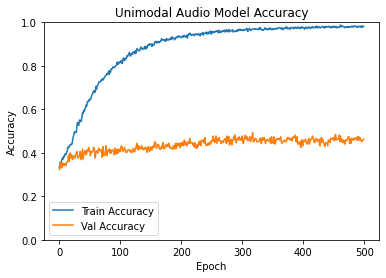